In [1]:
#The main file
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
mouse_file = 'data/Mouse_metadata.csv'
mouse_df = pd.read_csv(mouse_file)

file = 'data/Study_results.csv'
df = pd.read_csv(file)

print(len(mouse_df['Mouse ID'].unique()))

mouse_df = mouse_df.drop_duplicates(['Mouse ID'],keep= 'last')

df = df.drop_duplicates(['Mouse ID','Timepoint'],keep= 'last')

regimen = mouse_df.groupby(['Mouse ID', 'Drug Regimen'])
regimen.head()

249


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
#Similar to a VLookup, takes the medicide name from mouse data and adds it to test results
#Can only be run once without error
df.insert(2, 'Drug Regimen', df['Mouse ID'].map(mouse_df.set_index('Mouse ID')['Drug Regimen']))


In [4]:
df

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3),Metastatic Sites
0,b128,0,Capomulin,45.000000,0
1,f932,0,Ketapril,45.000000,0
2,g107,0,Ketapril,45.000000,0
3,a457,0,Ketapril,45.000000,0
4,c819,0,Ketapril,45.000000,0
...,...,...,...,...,...
1888,r944,45,Capomulin,41.581521,2
1889,u364,45,Capomulin,31.023923,3
1890,p438,45,Ceftamin,61.433892,1
1891,x773,45,Placebo,58.634971,4


In [5]:
means= df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
medians = df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
variances = df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
stdevs = df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
errs = df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

summary = pd.DataFrame(means)
info = [medians, variances, stdevs, errs]

for d in info:
    summary= pd.merge(summary, d, on= 'Drug Regimen')
summary.columns = ['Mean', 'Median', 'Variance', 'Standard Dev', 'SEM']
summary

,Mean,Median,Variance,Standard Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


<AxesSubplot:xlabel='Drug Regimen'>

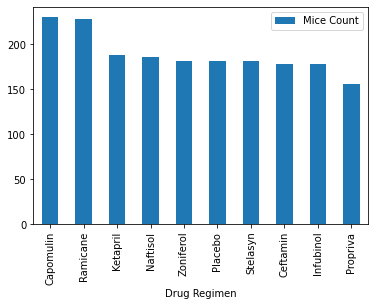

In [6]:
mice_count = df.groupby(['Drug Regimen'])['Mouse ID'].size()
#mice_count = pd.DataFrame(mice_count)
#mice_count['count'] = len(mice_count['Mouse ID'])


mice_count = pd.DataFrame(mice_count)
mice_count.columns = ['Mice Count']
mice_count = mice_count.sort_values('Mice Count', ascending = False)

mice_count.plot.bar()

array([<AxesSubplot:ylabel='Mouse Count'>], dtype=object)

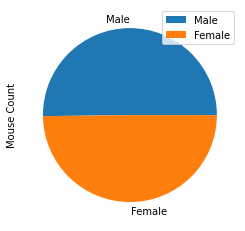

In [7]:
gender = mouse_df.groupby(['Sex'])['Mouse ID'].nunique()
gender = pd.DataFrame(gender)
gender.columns = ['Mouse Count']
gender = gender.sort_values('Mouse Count', ascending = False)
gender.plot.pie(subplots = True)

In [66]:
#Capomulin, Ramicane, Infubinol, and Ceftamin
meds = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
finals = df.loc[(df['Timepoint'])==45]

volume = finals.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sum().reset_index()
volume = pd.DataFrame(volume)
volume = volume.loc[(volume['Drug Regimen']).isin(meds)]
finals = finals.loc[(finals['Drug Regimen']).isin(meds)]

data = []
count = 0
for m in meds:
    add = finals.loc[(finals['Drug Regimen']) == m]
    add = add['Tumor Volume (mm3)'].tolist()
    count += len(add)
    data.append(add)
print(count)
#x = finals['Drug Regimen'].tolist()
#y = finals['Tumor Volume (mm3)'].tolist()
#plt.boxplot(data, showfliers=True)
#plt.show()
#print(data[1])
for n in range(0,4):
    lower=np.quantile(data[n], .25)
    upper =np.quantile(data[n], .75)
    small=min(data[n])
    big =max(data[n])
    iqr = upper - lower
    lowbound= np.quantile(data[n], .25) - (1.5 * iqr)
    upbound= np.quantile(data[n], .75) + (1.5 * iqr)
    print(f'Max: {big}\nMin: {small} \nUpper Bound: {upbound} \nLower Bound: {lowbound}\n\n')

63
Max: 47.68596303
Min: 23.34359787 
Upper Bound: 51.83201549 
Lower Bound: 20.70456164999999


Max: 45.22086888
Min: 22.05012627 
Upper Bound: 49.79900043124999 
Lower Bound: 19.690480101250003


Max: 72.2267309
Min: 60.91876652 
Upper Bound: 75.08224443499999 
Lower Bound: 55.35777559500001


Max: 68.92318457
Min: 59.74190064 
Upper Bound: 76.66786758 
Lower Bound: 52.29350701999999




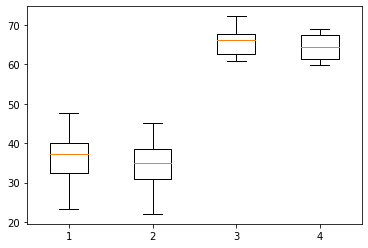

In [51]:
plt.boxplot(data)
plt.show()